<a href="https://www.kaggle.com/code/sanjay277/2019-indian-general-elections-analysis-eda?scriptVersionId=124231581" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
%matplotlib inline
import random
import plotly.io as pio
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv('/kaggle/input/indian-candidates-for-general-election-2019/LS_2.0.csv')
df.head()

STATE CONSTITUENCY                   NAME  WINNER PARTY SYMBOL  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  GENDER CRIMINAL\nCASES   AGE CATEGORY      EDUCATION  \
0   MALE              52  52.0       ST      12th Pass   
1   MALE               0  54.0       ST  Post Graduate   
2   MALE               3  52.0       ST      12th Pass   
3    NaN             NaN   NaN      NaN            NaN   
4   MALE               5  58.0       SC      Doctorate   

                        ASSETS                  LIABILITIES  GENERAL\nVOTES  \
0    Rs 30,99,414\n ~ 30 Lacs+      Rs 2,31,450\n ~ 2 Lacs+          376892   
1  Rs 1,84,77,888\n ~ 1 Crore+      Rs 8,47,000\n ~ 8 Lacs+          318665   
2  Rs 3,64,91,000\n ~ 3 Crore+  Rs 1,53,00,000\n ~ 1 Crore+          314057   
3                          NaN                          NaN           13030   
4  Rs 7,42,74,036\n ~ 7 Crore+    Rs 86,06,522\n ~ 86 Lacs+          644459   

   POSTAL\nVOTES  TOTAL\nVOTES  OVER TOTAL ELECTORS \nIN CONSTITUENCY  \
0            482        377374                              25.330684   
1            149        318814                              21.399929   
2            181        314238                              21.092771   
3              6         13036                               0.875023   
4           2416        646875                              33.383823   

   OVER TOTAL VOTES POLLED \nIN CONSTITUENCY  TOTAL ELECTORS  
0                                  35.468248         1489790  
1                                  29.964370         1489790  
2                                  29.534285         1489790  
3                                   1.225214         1489790  
4                                  56.464615         1937690

## The dataset consist of top 3 candidates from each constituency along with NOTA votes for each constituency

In [3]:
df.shape

(2263, 19)

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace('\n','_') 
df.rename(columns = {'over total electors _in constituency':'total_voters',
                    'over total votes polled _in constituency':'votes_polled',
                    'total electors':'total_electors'},inplace=True)

In [5]:
print('Major parties that contested elections in 2019 General Elections =',df['party'].nunique())

Major parties that contested elections in 2019 General Elections = 133


In [6]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
df['assets'] = df['assets'].apply((value_cleaner))
df['liabilities'] = df['liabilities'].apply((value_cleaner))
df.head()

state constituency                   name  winner party symbol  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP  Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   TRS    Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC   Hand   
3      Telangana     ADILABAD                   NOTA       0  NOTA    NaN   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP  Lotus   

  gender criminal_cases   age category      education    assets liabilities  \
0   MALE             52  52.0       ST      12th Pass   3099414      231450   
1   MALE              0  54.0       ST  Post Graduate  18477888      847000   
2   MALE              3  52.0       ST      12th Pass  36491000    15300000   
3    NaN            NaN   NaN      NaN            NaN         0           0   
4   MALE              5  58.0       SC      Doctorate  74274036     8606522   

   general_votes  postal_votes  total_votes  total_voters  votes_polled  \
0         376892           482       377374     25.330684     35.468248   
1         318665           149       318814     21.399929     29.964370   
2         314057           181       314238     21.092771     29.534285   
3          13030             6        13036      0.875023      1.225214   
4         644459          2416       646875     33.383823     56.464615   

   total_electors  
0         1489790  
1         1489790  
2         1489790  
3         1489790  
4         1937690

In [7]:
df['education']=df['education'].str.replace('\n','')
df['party']=df['party'].str.replace('TRS','BRS')

In [8]:
df1=df[df['party']!='NOTA']
df1.isnull().sum()

state             0
constituency      0
name              0
winner            0
party             0
symbol            0
gender            0
criminal_cases    0
age               0
category          0
education         0
assets            0
liabilities       0
general_votes     0
postal_votes      0
total_votes       0
total_voters      0
votes_polled      0
total_electors    0
dtype: int64

### There are no missing values

In [9]:
df.dtypes

state              object
constituency       object
name               object
winner              int64
party              object
symbol             object
gender             object
criminal_cases     object
age               float64
category           object
education          object
assets             object
liabilities        object
general_votes       int64
postal_votes        int64
total_votes         int64
total_voters      float64
votes_polled      float64
total_electors      int64
dtype: object

In [10]:
df=df.fillna(0)
df['criminal_cases']=df['criminal_cases'].replace({'Not Available':0})
df['criminal_cases'] = pd.to_numeric(df['criminal_cases'],errors='coerce').astype(np.int64)
df['age']=df['age'].apply(lambda x:round(x))

def numer(i):
    df[i]=pd.to_numeric(df[i])

numer('assets')
numer('liabilities')
numer('age')


<AxesSubplot:>

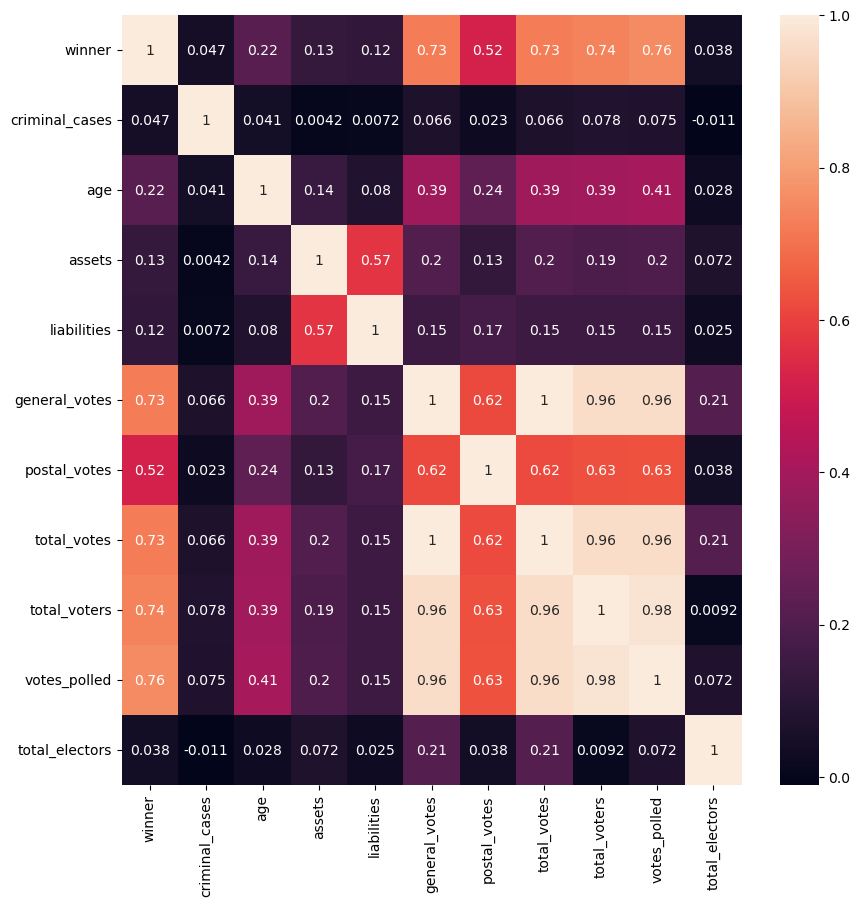

In [11]:
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## DISTRIBUTION OF CONSTITUENCIES OVER ALL THE STATES

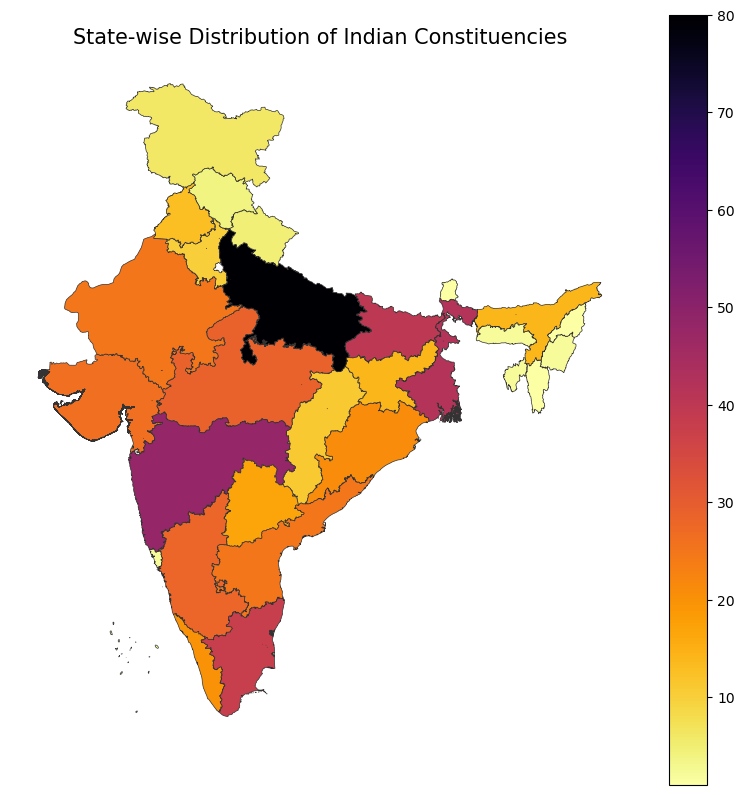

In [12]:
st=df.groupby('state').apply(lambda x:x['constituency']
                             .nunique()).reset_index(name='constituency')
shp_gdf = gpd.read_file('/kaggle/input/india-states/Igismap/Indian_States.shp')
merged=shp_gdf.set_index('st_nm').join(st.set_index('state'))
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('State-wise Distribution of Indian Constituencies',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='constituency', cmap='inferno_r',
                  linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

st.sort_values(by='constituency',ascending=False,inplace=True)
fig2 = px.bar(st, x='state', y='constituency',
                     color='constituency',
             labels={'pop':'Constituencies of India'})
fig2.update_layout(title_text='Statewise distribution of the Constituencies all over India',
                   template='plotly_dark')
fig2.show()

#### U.P has the most parliament seats of 80.
#### The seats are divided based on the population of the state. The division of seats is followed based on 1971 population data.

In [13]:
df.head(10)

state constituency                               name  winner  \
0      Telangana     ADILABAD                     SOYAM BAPU RAO       1   
1      Telangana     ADILABAD                       Godam Nagesh       0   
2      Telangana     ADILABAD                      RATHOD RAMESH       0   
3      Telangana     ADILABAD                               NOTA       0   
4  Uttar Pradesh         AGRA              Satyapal Singh Baghel       1   
5  Uttar Pradesh         AGRA                   Manoj Kumar Soni       0   
6  Uttar Pradesh         AGRA                       Preeta Harit       0   
7    Maharashtra   AHMADNAGAR  Dr. SUJAY RADHAKRISHNA VIKHEPATIL       1   
8    Maharashtra   AHMADNAGAR            SANGRAM ARUNKAKA JAGTAP       0   
9    Maharashtra   AHMADNAGAR              SUDHAKAR LAXMAN AVHAD       0   

  party        symbol  gender  criminal_cases  age category      education  \
0   BJP         Lotus    MALE              52   52       ST      12th Pass   
1   BRS           Car    MALE               0   54       ST  Post Graduate   
2   INC          Hand    MALE               3   52       ST      12th Pass   
3  NOTA             0       0               0    0        0              0   
4   BJP         Lotus    MALE               5   58       SC      Doctorate   
5   BSP      Elephant    MALE               0   47       SC  Post Graduate   
6   INC          Hand  FEMALE               0   54       SC  Post Graduate   
7   BJP         Lotus    MALE               0   37  GENERAL      Doctorate   
8   NCP         Clock    MALE               1   34  GENERAL       Graduate   
9   VBA  Cup & Saucer    MALE               0   62  GENERAL       Graduate   

      assets  liabilities  general_votes  postal_votes  total_votes  \
0    3099414       231450         376892           482       377374   
1   18477888       847000         318665           149       318814   
2   36491000     15300000         314057           181       314238   
3          0            0          13030             6        13036   
4   74274036      8606522         644459          2416       646875   
5  133784385     22251891         434199          1130       435329   
6   55075753            0          44877           272        45149   
7  168664576      2623964         696961          7699       704660   
8   94488381     32549132         419364          3822       423186   
9   13949000      1400000          31644           163        31807   

   total_voters  votes_polled  total_electors  
0     25.330684     35.468248         1489790  
1     21.399929     29.964370         1489790  
2     21.092771     29.534285         1489790  
3      0.875023      1.225214         1489790  
4     33.383823     56.464615         1937690  
5     22.466390     37.999125         1937690  
6      2.330042      3.940979         1937690  
7     37.856533     58.425159         1861396  
8     22.734872     35.087431         1861396  
9      1.708771      2.637200         1861396

### Creating Sunburst image of all states and constituencies

In [14]:
st_val=df[['state','constituency','total_electors']]
fig=px.sunburst(st_val,path=['state','constituency']
                ,values='total_electors',
               color='total_electors',
               color_continuous_scale='viridis_r')
fig.update_layout(title_text='Sunburst Image of States and Constituencies',
                  template='plotly_dark')
fig.show()

In [15]:
df1=df[df['party']!='NOTA']

### Finding the gender distribution

In [16]:
req=pd.DataFrame(df1['gender'])
fig=px.pie(req,names='gender')
fig.update_layout(title_text='Gender Distribution in Participation',
                  template='plotly_dark')
fig.show()

In [17]:
gen=df1.groupby('gender').apply(lambda x:x['name'].count()).reset_index(name='counts')
gen['category']='Overall gender ratio'
winners=df1[df1['winner']==1]
gen_win=winners.groupby('gender').apply(lambda x:x['name'].count()).reset_index(name='counts')
gen_win['category']='Winning gender ratio'
total=pd.concat([gen_win,gen])

fig=px.bar(total,x='gender',y='counts',color='category',barmode='group')
fig.update_layout(title_text='Participation vs Win counts',
                  template='plotly_dark')
fig.show()

In [18]:
party_state=df1.groupby('party')['state'].nunique() \
.reset_index(name='state')
party_const=df1.groupby('party')['constituency'].count() \
.reset_index(name='constituency')
top_const=party_const.sort_values(by='constituency',ascending=False)[:25]
top_party=pd.merge(top_const,party_state,how='inner',left_on='party',right_on='party')
fig=px.scatter(top_party,x='constituency',
               y='state',color='state',size='constituency',
               hover_data=['party'])
fig.update_layout(title_text='Constituency vs Statewise participation \
for the most contesting Political Parties',template='plotly_dark')
fig.show()

## Each Party's Statewise performance report

Text(0.5, 1.0, 'Statewise report card for the Political Parties in India')

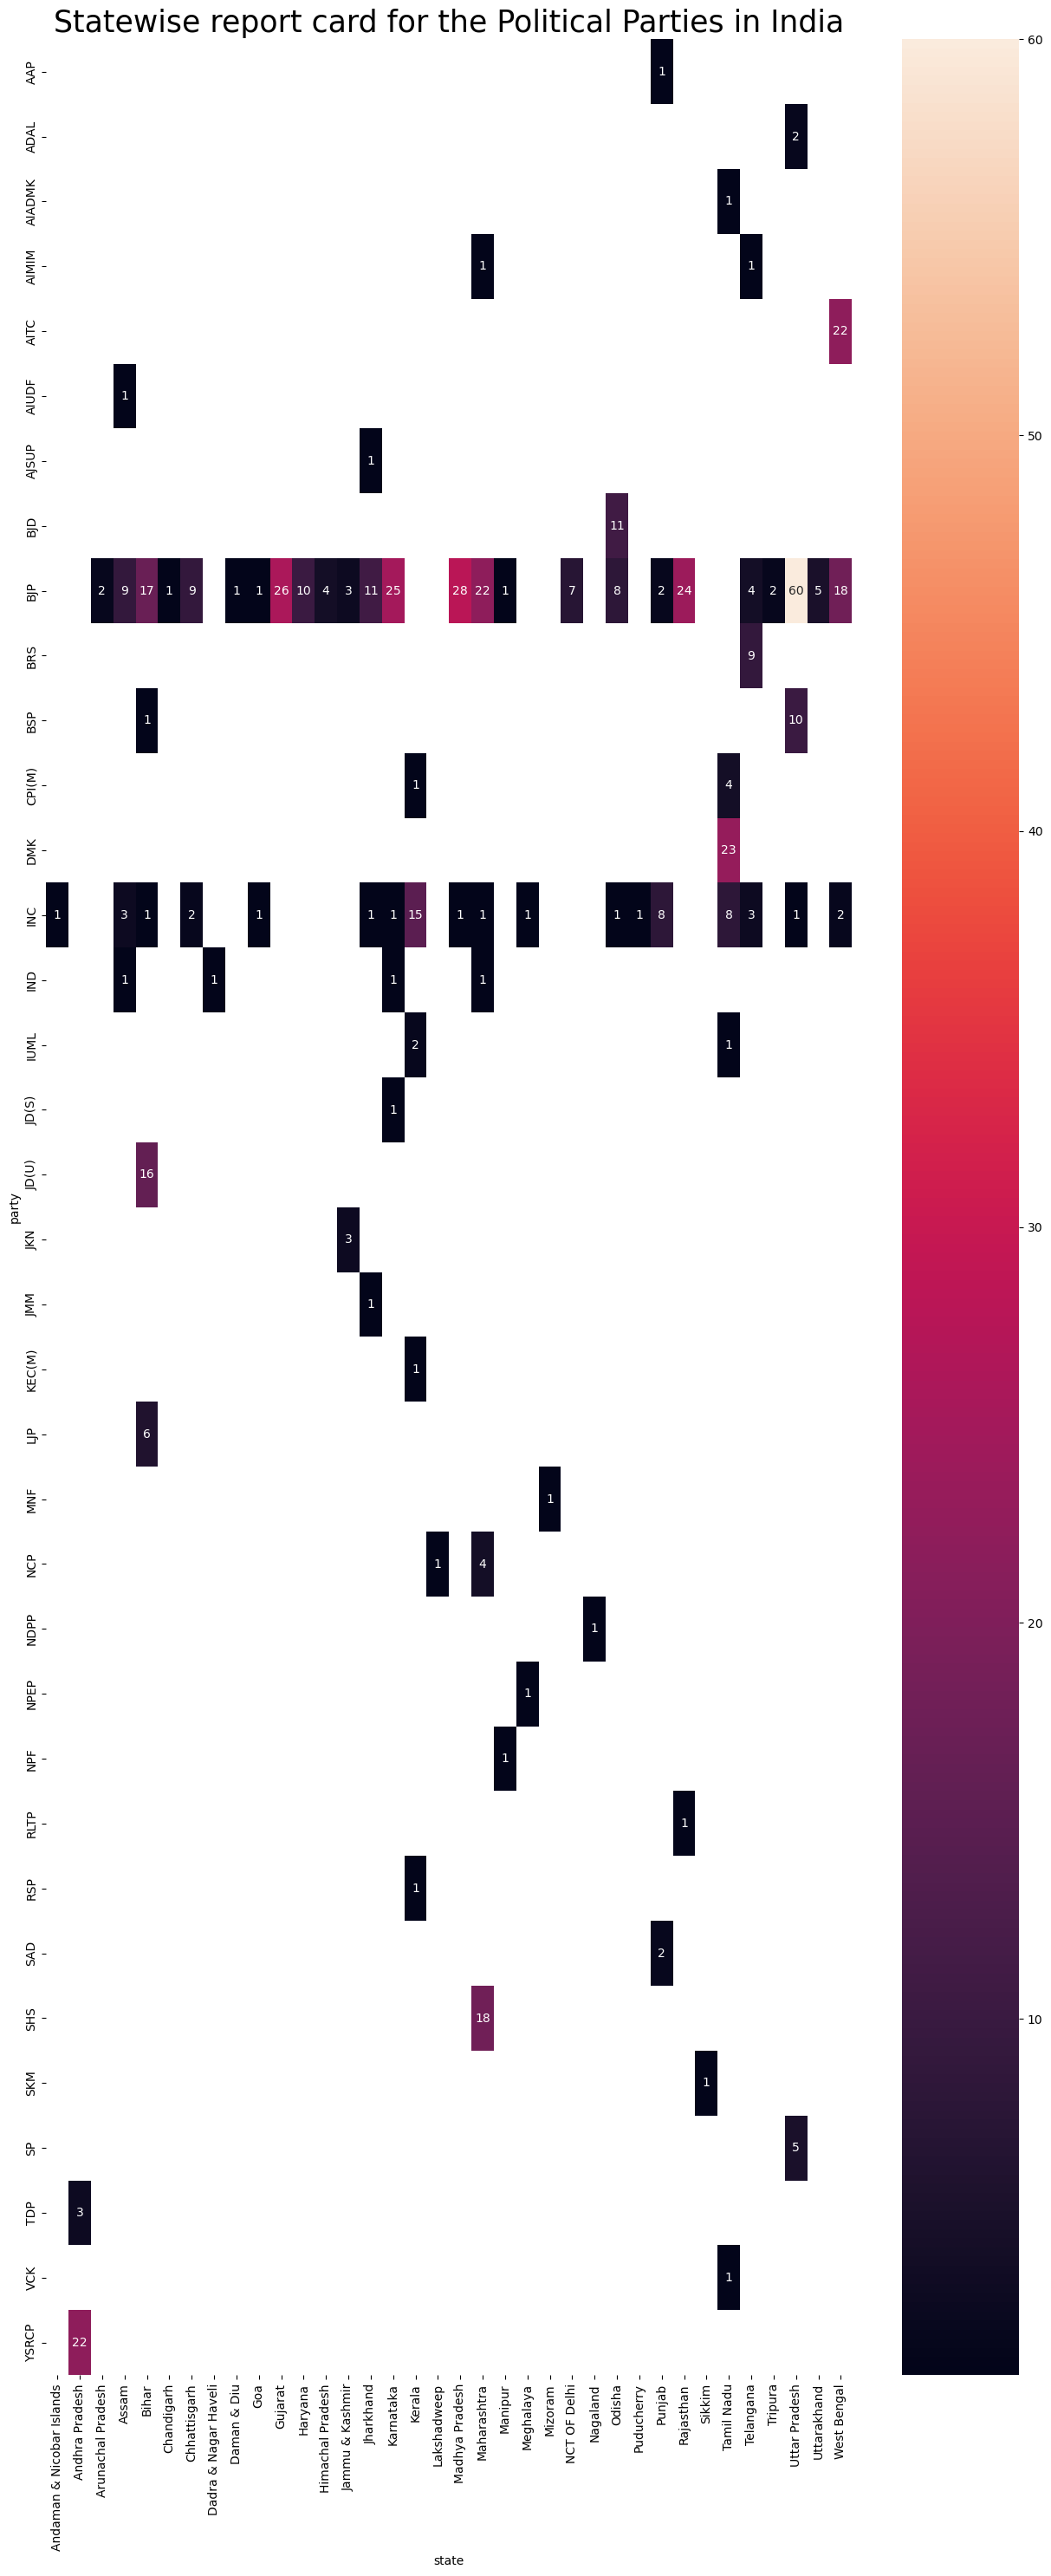

In [19]:
st_party=winners.groupby(['party','state'])['winner'].sum()\
.reset_index(name='wins')
pivot_st_party=pd.pivot(st_party,index='party',columns='state',values='wins')
plt.figure(figsize=(15,35))
sns.heatmap(pivot_st_party,annot=True,fmt="g")
plt.xlabel('state')
plt.ylabel('party')
plt.title('Statewise report card for the Political Parties in India',size=25)

## Vote share of top 5 parties

In [20]:
df1.head(1)

state constituency            name  winner party symbol gender  \
0  Telangana     ADILABAD  SOYAM BAPU RAO       1   BJP  Lotus   MALE   

   criminal_cases  age category  education   assets  liabilities  \
0              52   52       ST  12th Pass  3099414       231450   

   general_votes  postal_votes  total_votes  total_voters  votes_polled  \
0         376892           482       377374     25.330684     35.468248   

   total_electors  
0         1489790

In [21]:
vote_share_top5=df1.groupby('party')['total_votes'].sum().nlargest(5).index.tolist()
def vote_share(row):
    if row['party'] not in vote_share_top5:
        return 'other'
    else:
        return row['party']
df1['party_new']=df1.apply(vote_share,axis=1)
counts = df1.groupby('party_new')['total_votes'].sum()
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Partywise Vote Share')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

In [22]:
winners1=winners[winners['criminal_cases']!=0]
winners0=winners[winners['criminal_cases']==0]

winners_cri=winners1.groupby('party')['name']\
.count().reset_index(name='candidates')

winners_no_cri=winners0.groupby('party')['name']\
.count().reset_index(name='candidates')

winners_cri['status']='pending_case'
winners_no_cri['status']='no_pending_case'

final_winners=pd.concat([winners_no_cri,winners_cri])

fig=px.bar(final_winners,x='party',y='candidates',color='status')
fig.update_layout(title_text='Winners with criminal cases vs no criminal cases\
 in parties',template='plotly_dark')
fig.show()

## Relationship between Age & Candidates

In [23]:
age_cnt=df1.groupby(['age','gender'])['name'].count() \
.reset_index(name='counts')
fig = px.histogram(age_cnt,x='age',y='counts',color='gender'
              ,marginal='violin',
              title='Age Counts Distribution among the candidates')
fig.update_layout(title_text='Age Counts Distribution among \
the candidates',template='plotly_dark')
fig.show()

## Observation : 
### 1.Age of male candidates ranges from 50-59 and for female candidates it is 40-49
### 2.Average age of male candidates is 55 and for female candidates it is 50
### 3.Minimum age of male and female candidates is 25 
### 4.Maximum age of male candidate is 86 and maximum age of female candidate is 81

# Average age of candidates from large parties

In [24]:
pt_avg_age=df1.groupby('party')['age'].mean().round() \
.reset_index(name='avg_age')
final_avg_age=pd.merge(top_party['party'],pt_avg_age,
                       how='inner',left_on='party',
                       right_on='party')
final_avg_age=final_avg_age.sort_values(by='avg_age',ascending=False)

plt.figure(figsize=(10,10))
fig=px.bar(final_avg_age,x='party',y='avg_age',
           color='avg_age')
fig.update_layout(title_text='Average age of candidates \
in each party',template='plotly_dark')
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [25]:
winner_avg_age=winners1.groupby('party')['age'].mean().round() \
.reset_index(name='avg_age')
final_avg_age=pd.merge(top_party['party'],winner_avg_age,
                       how='inner',left_on='party',
                       right_on='party')
final_avg_age=final_avg_age.sort_values(by='avg_age',ascending=False)

plt.figure(figsize=(10,10))
fig=px.bar(final_avg_age,x='party',y='avg_age',
           color='avg_age')
fig.update_layout(title_text='Average age of candidates \
in each party',template='plotly_dark')
fig.show()

<Figure size 1000x1000 with 0 Axes>

In [26]:
print('Average age of MPs is',winners1['age'].mean().round())

Average age of MPs is 53.0


In [27]:
cri_cases=df1.groupby('criminal_cases')['name'].count().reset_index(name='counts')
fig = px.histogram(cri_cases, x='criminal_cases',y='counts',marginal='violin')
fig.update_layout(title_text='Criminal Cases Counts Distribution among the politicians',template='plotly_dark')
fig.show()


## Observation: Many of the candidates have pending cases against them. A candidate has a maximum of 240 pending cases

In [28]:
df1[df1['criminal_cases']==240]

state    constituency         name  winner party symbol gender  \
1652  Kerala  PATHANAMTHITTA  K SURENDRAN       0   BJP  Lotus   MALE   

      criminal_cases  age category education   assets  liabilities  \
1652             240   49  GENERAL  Graduate  4044300      1308799   

      general_votes  postal_votes  total_votes  total_voters  votes_polled  \
1652         295627          1769       297396     21.507715     28.947087   

      total_electors party_new  
1652         1382741       BJP

In [29]:
cat_overall=df1.groupby('category')['name'].count()\
.reset_index(name='counts')
cat_overall['status']='Overall Category Counts'
cat_win=winners.groupby('category')['name'].count()\
.reset_index(name='counts')
cat_win['status']='Winner Category Counts'
cat_overl_win=pd.concat([cat_win,cat_overall])
fig=px.bar(cat_overl_win,x='category',y='counts',
           color='status',barmode='group')
fig.update_layout(title_text='Participation vs winning \
among categories',template='plotly_dark')
fig.show()

In [30]:
df1['education'].unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available'], dtype=object)

In [31]:
df1.head()

state constituency                   name  winner party    symbol  \
0      Telangana     ADILABAD         SOYAM BAPU RAO       1   BJP     Lotus   
1      Telangana     ADILABAD           Godam Nagesh       0   BRS       Car   
2      Telangana     ADILABAD          RATHOD RAMESH       0   INC      Hand   
4  Uttar Pradesh         AGRA  Satyapal Singh Baghel       1   BJP     Lotus   
5  Uttar Pradesh         AGRA       Manoj Kumar Soni       0   BSP  Elephant   

  gender  criminal_cases  age category      education     assets  liabilities  \
0   MALE              52   52       ST      12th Pass    3099414       231450   
1   MALE               0   54       ST  Post Graduate   18477888       847000   
2   MALE               3   52       ST      12th Pass   36491000     15300000   
4   MALE               5   58       SC      Doctorate   74274036      8606522   
5   MALE               0   47       SC  Post Graduate  133784385     22251891   

   general_votes  postal_votes  total_votes  total_voters  votes_polled  \
0         376892           482       377374     25.330684     35.468248   
1         318665           149       318814     21.399929     29.964370   
2         314057           181       314238     21.092771     29.534285   
4         644459          2416       646875     33.383823     56.464615   
5         434199          1130       435329     22.466390     37.999125   

   total_electors party_new  
0         1489790       BJP  
1         1489790     other  
2         1489790       INC  
4         1937690       BJP  
5         1937690       BSP

In [32]:
ed_cnt=df1.groupby('education')['name'].count().reset_index(name='counts')
fig=go.Figure(data=[go.Pie(labels=ed_cnt['education'],values=ed_cnt['counts'],
                           pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.1, 0.2,0, 0.1, 0.2],
                           title='Education Qualification of the Candidates')])
                           

fig.update_layout(title_text='Overall Education Qualification of all the Candidates',
                  template='plotly_dark')
fig.show()

ed_win_cnt=winners.groupby('education').apply(lambda x:x['party'].count()) \
.reset_index(name='counts')
fig2 = go.Figure(data=[go.Pie(labels=ed_win_cnt['education'], values=ed_win_cnt['counts'], 
                              pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.1, 0.2,0, 0.1, 0.2],
                              title='Education Qualification of the Winners')])
fig2.update_layout(title_text='Education Qualification of the Winners',template='plotly_dark')
fig2.show()


In [33]:
win_as_liab=winners.sort_values(by='assets',ascending=False)
fig=px.scatter(win_as_liab,x='assets',y='liabilities'
               ,color='state',
               size='assets',
               hover_data=(['name','party','constituency','state','winner']),
                 title='Assets vs Liabilities for the Winning Politicians')
fig.update_layout(title_text='Assets vs Liabilities for the Winning Politicians',template='plotly_dark')
fig.show()

## Estimating number of Reserved Constituencies
### 1.We will consider a constituency with only ST or SC candidates as reserved constituency for ST and SC respectively
### 2. Constituency with less than three candidates from SC or ST category will be considered as a General constituency


In [34]:
df1=df1.reset_index()

In [35]:
df1['id']=df1.index//3

In [36]:
df1=df1.drop(['index'],axis=1)

In [37]:
rev=df1.groupby(['id','constituency','party','category']).apply(lambda x:x['total_votes']).reset_index(name='counts')
rev0=rev.groupby(['id','constituency','category'])['category'].count().reset_index(name='counts')

In [38]:
rev.columns

Index(['id', 'constituency', 'party', 'category', 'level_4', 'counts'], dtype='object')

In [39]:
rev=rev.drop(['level_4'],axis=1)

In [40]:
rev0.shape

(1067, 4)

In [41]:
y=[]
for i,j in zip(rev0['counts'],rev0['category']):
    if i==3 and j=='ST':
        y.append(f'Reserved for {j}')
    elif i==3 and j=='SC':
        y.append(f'Reserved for {j}')
    else:
        y.append('General')
    
        

In [42]:
rev0=rev0.assign(status=y)

In [43]:
rev0.head()

id    constituency category  counts           status
0   0        ADILABAD       ST       3  Reserved for ST
1   1            AGRA       SC       3  Reserved for SC
2   2      AHMADNAGAR  GENERAL       3          General
3   3  AHMEDABAD EAST  GENERAL       2          General
4   3  AHMEDABAD WEST       SC       1          General

In [44]:
rev0=rev0.drop_duplicates('constituency')

In [45]:
rev0.shape

(539, 5)

In [46]:
rev0.groupby('category')['status'].count()

category
GENERAL    402
SC          84
ST          53
Name: status, dtype: int64

## Estimation:
### General seats   : 402
### Reserved for SC : 84
### Reserved for ST : 53

## Correct Allocation of seats:
### General seats   : 412
### Reserved for SC : 84
### Reserved for ST : 47

### The estimation was close. As the dataset only provides the top 3 candidates from each constituency and the estimation was carried out based on those three candidates,the estimation didn't turn out perfectly.
### As a constituency could have been a general seat but parties might have put forward candidates from SC or ST category